In [87]:
# Import the modules of interest
import ee
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geemap.foliumap as geemap
from geemap import cartoee
import folium

# import branca.colormap as cm
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import ee
import geemap
import numpy as np
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1 import make_axes_locatable

from plotting_utils import (
    get_geometries,
    get_min_max_scale,
    get_color_palettes,
    plot_gee_image,
    get_global_img_mosaic,
    url_to_image,
    blend_geom_to_img,
    get_dimensions_bbox,
    get_imgc,
)

ee.Initialize(project="ee-speckerfelix")

In [88]:
colors = get_color_palettes()
lai_mean_vis = colors["lai_visparams"]
fcover_mean_vis = colors["fcover_visparams"]
fapar_mean_vis = colors["fapar_visparams"]

lai_std_vis = colors["lai_std_visparams"]
fcover_std_vis = colors["fcover_std_visparams"]
fapar_std_vis = colors["fapar_std_visparams"]

print(colors.keys())

dict_keys(['lai_hex', 'lai_norm', 'lai_cmap', 'lai_ts', 'lai_visparams', 'fapar_hex', 'fapar_norm', 'fapar_cmap', 'fapar_ts', 'fapar_visparams', 'fcover_hex', 'fcover_norm', 'fcover_cmap', 'fcover_ts', 'fcover_visparams', 'std_hex', 'std_cmap', 'std_lai_norm', 'std_fapar_norm', 'std_fcover_norm', 'lai_std_visparams', 'fapar_std_visparams', 'fcover_std_visparams', 'diff_hex', 'diff_cmap', 'diff_visparams_lai', 'diff_visparams_fapar', 'diff_visparams_fcover', 'diff_lai_norm', 'diff_fapar_norm', 'diff_fcover_norm'])


In [89]:
geometries = {
    "amazon": ee.Geometry.Point([-72.17340937319422, -1.3068094361193225]),
    "india": ee.Geometry.Point([79.06727631365708, 25.25627938919203]),
    "borneo": ee.Geometry.Point([114.6243841070771, 0.8119582063049183]),
}

buffered_geoms = {}

# amazon example 50000m buffer / india 50000m buffer / borneo 5000m buffer
buffered_geoms["amazon"] = geometries["amazon"].buffer(50000).bounds()
buffered_geoms["india"] = geometries["india"].buffer(50000).bounds()
buffered_geoms["borneo"] = geometries["borneo"].buffer(50000).bounds()

In [90]:
lai = get_global_img_mosaic("lai", resolution="20m", year=2020)
fcover = get_global_img_mosaic("fcover", resolution="20m", year=2020)
fapar = get_global_img_mosaic("fapar", resolution="20m", year=2020)

lai_mean = lai.select("lai_mean")
lai_std = lai.select("lai_stdDev").updateMask(lai.select("lai_count").gt(1))
fcover_mean = fcover.select("fcover_mean")
fcover_std = fcover.select("fcover_stdDev").updateMask(
    fcover.select("fcover_count").gt(1)
)
fapar_mean = fapar.select("fapar_mean")
fapar_std = fapar.select("fapar_stdDev").updateMask(fapar.select("fapar_count").gt(1))

In [91]:
## image urls
lai_mean_url = lai_mean.getThumbURL(
    {
        "region": buffered_geoms["amazon"],
        "dimensions": 512,
        **lai_mean_vis,
    }
)

lai_std_url = lai_std.getThumbURL(
    {
        "region": buffered_geoms["amazon"],
        "dimensions": 512,
        **lai_std_vis,
    }
)

fcover_mean_url = fcover_mean.getThumbURL(
    {
        "region": buffered_geoms["india"],
        "dimensions": 512,
        **fcover_mean_vis,
    }
)

fcover_std_url = fcover_std.getThumbURL(
    {
        "region": buffered_geoms["india"],
        "dimensions": 512,
        **fcover_std_vis,
    }
)

fapar_mean_url = fapar_mean.getThumbURL(
    {
        "region": buffered_geoms["borneo"],
        "dimensions": 512,
        **fapar_mean_vis,
    }
)

fapar_std_url = fapar_std.getThumbURL(
    {
        "region": buffered_geoms["borneo"],
        "dimensions": 512,
        **fapar_std_vis,
    }
)

print(lai_mean_url)
print(lai_std_url)
print(fcover_mean_url)
print(fcover_std_url)
print(fapar_mean_url)
print(fapar_std_url)

https://earthengine.googleapis.com/v1/projects/ee-speckerfelix/thumbnails/d8c943ea1813629cb603281657991af5-9977dd86d33df68660ef1ef6f29596ee:getPixels
https://earthengine.googleapis.com/v1/projects/ee-speckerfelix/thumbnails/b7c590b969363d7c05c0d62990b91f9d-cae4d4072fb9c0aea6c2e2fddc84be5f:getPixels
https://earthengine.googleapis.com/v1/projects/ee-speckerfelix/thumbnails/12d6348276a1ef7c7d2c6f22030067ac-c1b2b20cc220b8eedb8826d2b658449b:getPixels
https://earthengine.googleapis.com/v1/projects/ee-speckerfelix/thumbnails/b5a81477643c049e165f407fd527f6b9-e265f51ebe906b09ceb79935b89686aa:getPixels
https://earthengine.googleapis.com/v1/projects/ee-speckerfelix/thumbnails/7982556f0af76c4986d466d0ec168e53-b70275e136a68f473c72854d48fc3e58:getPixels
https://earthengine.googleapis.com/v1/projects/ee-speckerfelix/thumbnails/7f3e2b275f4edf9be62c2f1f15f4315a-f00198c7a6ab80b7e22619fb5def696d:getPixels


In [92]:
# print sizes of bounding boxes
print("Amazon", get_dimensions_bbox(buffered_geoms["amazon"]))
print("India", get_dimensions_bbox(buffered_geoms["india"]))
print("Borneo", get_dimensions_bbox(buffered_geoms["borneo"]))

Amazon (99496.92055731932, 99484.60410022103)
India (99935.99581633265, 99667.54220069536)
Borneo (99525.1213409315, 99484.28810566783)


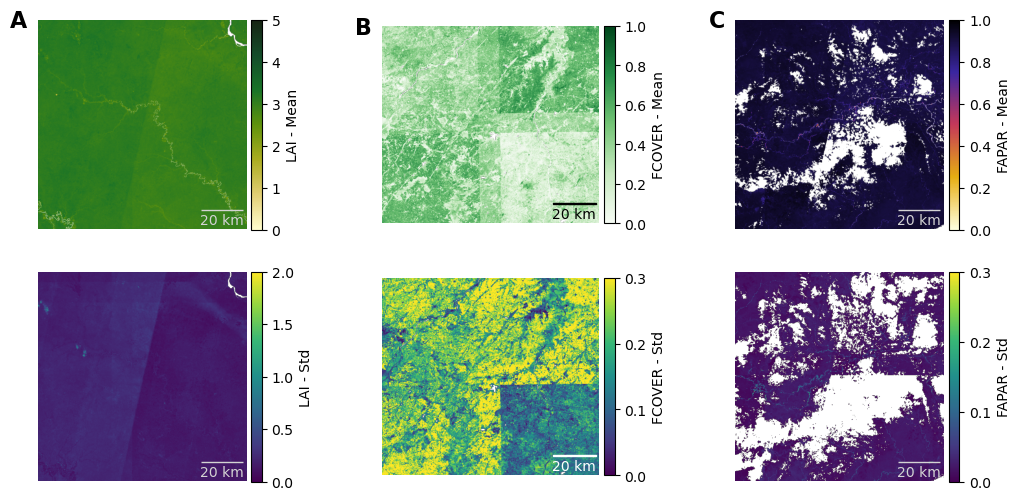

In [104]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

# increase space between columns
plt.subplots_adjust(wspace=0.5)

for ax in axs.flatten():
    ax.axis("off")

lai_mean_img = url_to_image(lai_mean_url)
axs[0, 0].imshow(lai_mean_img)

lai_std_img = url_to_image(lai_std_url)
axs[1, 0].imshow(lai_std_img)

fcover_mean_img = url_to_image(fcover_mean_url)
axs[0, 1].imshow(fcover_mean_img)

fcover_std_img = url_to_image(fcover_std_url)
axs[1, 1].imshow(fcover_std_img)

fapar_mean_img = url_to_image(fapar_mean_url)
axs[0, 2].imshow(fapar_mean_img)

fapar_std_img = url_to_image(fapar_std_url)
axs[1, 2].imshow(fapar_std_img)


divider = make_axes_locatable(axs[0, 0])
cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
cbar_lai_mean = fig.colorbar(
    cm.ScalarMappable(norm=colors["lai_norm"], cmap=colors["lai_cmap"]),
    cax=cbar_ax,
    orientation="vertical",
)
cbar_lai_mean.set_label("LAI - Mean")


divider = make_axes_locatable(axs[1, 0])
cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
cbar_lai_std = fig.colorbar(
    cm.ScalarMappable(norm=colors["std_lai_norm"], cmap=colors["std_cmap"]),
    cax=cbar_ax,
    orientation="vertical",
)
cbar_lai_std.set_ticks([0, 0.5, 1, 1.5, 2])
cbar_lai_std.set_label("LAI - Std")


divider = make_axes_locatable(axs[0, 1])
cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
cbar_fcover_mean = fig.colorbar(
    cm.ScalarMappable(norm=colors["fcover_norm"], cmap=colors["fcover_cmap"]),
    cax=cbar_ax,
    orientation="vertical",
)
cbar_fcover_mean.set_label("FCOVER - Mean")


divider = make_axes_locatable(axs[1, 1])
cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
cbar_fcover_std = fig.colorbar(
    cm.ScalarMappable(norm=colors["std_fcover_norm"], cmap=colors["std_cmap"]),
    cax=cbar_ax,
    orientation="vertical",
)
cbar_fcover_std.set_ticks([0, 0.1, 0.2, 0.3])
cbar_fcover_std.set_label("FCOVER - Std")

divider = make_axes_locatable(axs[0, 2])
cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
cbar_fapar_mean = fig.colorbar(
    cm.ScalarMappable(norm=colors["fapar_norm"], cmap=colors["fapar_cmap"]),
    cax=cbar_ax,
    orientation="vertical",
)
cbar_fapar_mean.set_label("FAPAR - Mean")


divider = make_axes_locatable(axs[1, 2])
cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
cbar_fapar_std = fig.colorbar(
    cm.ScalarMappable(norm=colors["std_fapar_norm"], cmap=colors["std_cmap"]),
    cax=cbar_ax,
    orientation="vertical",
)
cbar_fapar_std.set_ticks([0, 0.1, 0.2, 0.3])
cbar_fapar_std.set_label("FAPAR - Std")

scalebar = AnchoredSizeBar(
    axs[0, 0].transData,
    102,  # 512 pixels = 100km ; 20km = 102.4 pixels
    "20 km",
    "lower right",
    pad=0.1,
    color="lightgrey",
    frameon=False,
    size_vertical=1,
)
axs[0, 0].add_artist(scalebar)

scalebar = AnchoredSizeBar(
    axs[1, 0].transData,
    102,  # 512 pixels = 100km ; 20km = 102.4 pixels
    "20 km",
    "lower right",
    pad=0.1,
    color="lightgrey",
    frameon=False,
    size_vertical=1,
)
axs[1, 0].add_artist(scalebar)

scalebar = AnchoredSizeBar(
    axs[0, 1].transData,
    102,  # 512 pixels = 100km ; 20km = 102.4 pixels
    "20 km",
    "lower right",
    pad=0.1,
    color="black",
    frameon=False,
    size_vertical=1,
)
axs[0, 1].add_artist(scalebar)

scalebar = AnchoredSizeBar(
    axs[1, 1].transData,
    102,  # 512 pixels = 100km ; 20km = 102.4 pixels
    "20 km",
    "lower right",
    pad=0.1,
    color="white",
    frameon=False,
    size_vertical=1,
)
axs[1, 1].add_artist(scalebar)


scalebar = AnchoredSizeBar(
    axs[0, 2].transData,
    102,  # 512 pixels = 100km ; 20km = 102.4 pixels
    "20 km",
    "lower right",
    pad=0.1,
    color="lightgrey",
    frameon=False,
    size_vertical=1,
)
axs[0, 2].add_artist(scalebar)

scalebar = AnchoredSizeBar(
    axs[1, 2].transData,
    102,  # 512 pixels = 100km ; 20km = 102.4 pixels
    "20 km",
    "lower right",
    pad=0.1,
    color="lightgrey",
    frameon=False,
    size_vertical=1,
)
axs[1, 2].add_artist(scalebar)

# add suplot numbering: A (column 1), B (column 2), C (column 3)
for i, label in enumerate(["A", "B", "C"]):
    axs[0, i].text(
        # 0.05,
        # 0.95,
        -0.05,
        1.05,
        label,
        transform=axs[0, i].transAxes,
        fontsize=16,
        fontweight="bold",
        va="top",
        ha="right",
    )

plt.savefig("../plots/suppl-fig1.png", dpi=300, bbox_inches="tight")